<a href="https://colab.research.google.com/github/visionNoob/Tensorflow_Tutorial/blob/master/Day_1/01%20-%20Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.debugging.set_log_device_placement(True)
tf.enable_eager_execution()
tf.__version__

'1.14.0'

## Hypothesis

* 우리가 세운 가설을 코드로 만들어봅시다.

$$ H(x) = Wx + b $$

* 예측해야되는 데이터는 주어집니다.

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:CPU:0


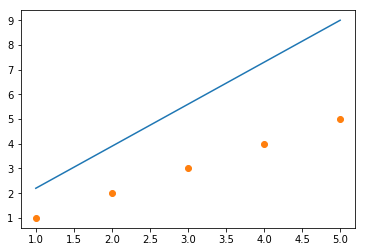

In [0]:
# 주어진 데이터를 확인해 봅시다.
x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 4, 5]

#이 데이터를 표현하는 모델을 정의해봅시다.

W = tf.Variable(1.7) # 임의의 값
b = tf.Variable(0.5) # 임의의 값

# Hpyothesis 가설
hypothesis = W * x_data + b

# 표로 출력
plt.plot(x_data, hypothesis.numpy())
plt.plot(x_data, y_data, 'o')
plt.show()

In [0]:
# 텐서 생성
tf.debugging.set_log_device_placement(True)
a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
c = tf.matmul(a, b)

print(c)

RuntimeError: ignored

## Cost
$$ cost(W)=\frac { 1 }{ m } \sum _{i=1}^{m}{ { ({ H(x_{ i }) }-y_{ i } })^{ 2 } }  $$

In [0]:
# Cost function == Loss Function
cost = tf.reduce_mean(tf.square(hypothesis - y_data))

sq = tf.square(3) # 제곱을 해주는 함수
print(sq)


# Cost Function을 조금 더 쉽게 표현해봅시다.
## Simplifed hypothesis

$$ H(x) = Wx $$ 

$$ cost(W)=\frac { 1 }{ m } \sum _{i=1}^{m}{ { ({ H(x_{ i }) }-y_{ i } })^{ 2 } }  $$

* b 를 W 행렬에 포함 시킬 수 있기 때문에 생략이 가능하다
* Cost 함수를 정의해보자

* 차원을 축소시켜서 생각해 볼 수 있다.


In [0]:
def cost_func(W, X, Y):
  hypothesis = X * W
  return tf.reduce_mean(tf.square(hypothesis - Y))

## 우리가 가정한 Cost Funtion을 살펴보자

$$ cost(W)=\frac { 1 }{ m } \sum _{i=1}^{m}{ { ({ H(x_{ i }) }-y_{ i } })^{ 2 } }  $$

W = -1, cost(W) = 18.67
$$ cost(W)=\frac { 1 }{ 3 } ( (-1 * 1 - 1)^2 + (-1 * 2 - 2)^2 + (-1 * 3 - 3)^2) $$

W = 0, cost(W) = 4.67
$$ cost(W)=\frac { 1 }{ 3 } ( (0 * 1 - 1)^2 + (0 * 2 - 2)^2 + (0 * 3 - 3)^2) $$

W = 1, cost(W) = 0
$$ cost(W)=\frac { 1 }{ 3 } ( (1 * 1 - 1)^2 + (1 * 2 - 2)^2 + (1 * 3 - 3)^2) $$

W = 2, cost(W) = 4.67
$$ cost(W)=\frac { 1 }{ 3 } ( (2 * 1 - 1)^2 + (2 * 2 - 2)^2 + (2 * 3 - 3)^2) $$


In [0]:
X = np.array([1, 2, 3])
Y = np.array([1, 2, 3])

W_values = np.linspace(-3, 5, num=15) # -3 ~ 5 사이의 15개 숫자들 - 15등분
cost_values = []

for feed_W in W_values:
    curr_cost = cost_func(feed_W, X, Y)
    cost_values.append(curr_cost)
    print("{:6.3f} | {:10.5f}".format(feed_W, curr_cost))
    
# Cost Function을 시각화 해보자    
    
plt.plot(W_values, cost_values, "b")
plt.ylabel('Cost(W)')
plt.xlabel('W')
plt.grid(True)
plt.show()

# Cost Function을 이용해서 최적 값은 어떻게 찾는것일까?

## Minimizing Cost == Gradient descent

$$ cost(W)=\frac { 1 }{ 2m } \sum _{i=1}^{m}{ { ({ H(x_{ i }) }-y_{ i } })^{ 2 } }  $$

$$ W:=W-\alpha \frac { 1 }{ m } \sum _{i=1}^{m}{ { ({ H(x_{ i }) }-y_{ i } })^{ 2 } }  $$

$$ \alpha = Learning Rate $$

In [0]:
W = tf.Variable([4.1]) # 임의의 값

for step in range(300):
    hypothesis = W * X
    cost = tf.reduce_mean(tf.square(hypothesis - Y))

    # Gradient Descent의 동작 원리
    lr = 0.01
    gradient = tf.reduce_mean(tf.multiply(tf.multiply(W, X) - Y, X))
    descent = W - tf.multiply(lr, gradient)
    W.assign(descent)
    
    if step % 10 == 0:
        print("step : {:3}, cost :  {:5.4f}, W : {:5.6f}".format(step, cost.numpy(), W.numpy()[0]))
        

# 다시 돌아와서 가설과 Cost Function을 이용해 계산해봅시다.
## GradientTape()
* 위에서는 직접 가중치의 업데이트를 진행
* TF에서 지원하는 함수로 업데이트할 가중치를 계산해 주는 역할
* Cost 함수와 예측 값으로 가중치를 얼마나 업데이트할지 결정해준다.

In [0]:
W = tf.Variable(1.7) # 임의의 값
b = tf.Variable(0.5) # 임의의 값

with tf.GradientTape() as tape:
  hypothesis = W * x_data + b
  cost = tf.reduce_mean(tf.square(hypothesis - y_data))
  
W_grad, b_grad = tape.gradient(cost, [W, b])

print(W_grad, b_grad)


## assign_sub()

* A = A - B
* A -= B
* 위의 계산을 해주는 함수

* 가중치 값을 업데이트

In [0]:
learning_rate = 0.01

W.assign_sub(learning_rate * W_grad)
b.assign_sub(learning_rate * b_grad)

W.numpy(), b.numpy()

### 여러번 돌려봅시다.

In [0]:
for i in range(100):
    with tf.GradientTape() as tape:
        #가설 설정
        hypothesis = W * x_data + b
        # Cost 함수 설정
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
        
    W_grad, b_grad = tape.gradient(cost, [W, b]) # gradient 계산
    
    learning_rate = 0.01
    # 가중치 업데이트
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    
    if i % 10 == 0:
      print("{:5}|{:10.4f}|{:10.4f}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))

plt.plot(x_data, y_data, 'o')
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.show()
